In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd /content/drive/MyDrive/SML

/content/drive/MyDrive/SML


In [16]:
# here for libs
import pandas as pd

In [17]:
# NVIDIA CUDA
import torch
if torch.cuda.is_available():
    print("CUDA is available.")

    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

    print(f"Current GPU device: {torch.cuda.current_device()}")
else:
    print("CUDA is not available. Running on CPU.")


CUDA is available.
Number of available GPUs: 1
GPU 0: Tesla T4
Current GPU device: 0


Project plan:
https://docs.google.com/document/d/1o2FlMo1je0yv7LeCV_mMHfmbbjH_XfzrfiKAefOh450/edit

In [18]:
#data import
data = pd.read_csv('./dataset/diabetes_dataset00.csv')
data.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


## 1.Preprocessing


In [19]:
##check missing data
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


,0


In [20]:
##lable
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


categorical_columns = ['Genetic Markers', 'Autoantibodies', 'Family History' , 'Environmental Factors', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Environmental Factors', 'Steroid Use History', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms', 'Physical Activity', 'History of PCOS', 'Target']


for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

output_file_path = './dataset/numeric_diabetes_dataset.csv'
data.to_csv(output_file_path, index=False)



data.head(50)

X = data.drop('Target', axis=1)
y = data['Target']




In [8]:
print(data.describe())


             Target  Genetic Markers  Autoantibodies  Family History  \
count  70000.000000     70000.000000    70000.000000    70000.000000   
mean       5.989729         0.501443        0.499171        0.502400   
std        3.737753         0.500001        0.500003        0.499998   
min        0.000000         0.000000        0.000000        0.000000   
25%        3.000000         0.000000        0.000000        0.000000   
50%        6.000000         1.000000        0.000000        1.000000   
75%        9.000000         1.000000        1.000000        1.000000   
max       12.000000         1.000000        1.000000        1.000000   

       Environmental Factors  Insulin Levels           Age           BMI  \
count           70000.000000    70000.000000  70000.000000  70000.000000   
mean                0.498743       21.607443     32.020700     24.782943   
std                 0.500002       10.785852     21.043173      6.014236   
min                 0.000000        5.000000   

## 2.Validation methods

### 2.1 cross validation

In [21]:
import numpy as np

def manual_train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]


    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    return X_train, X_test, y_train, y_test



### 2.2 k fold validation

In [22]:
import numpy as np

def manual_kfold(X, y, k=5, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    fold_size = len(X) // k
    folds = []

    for i in range(k):
        test_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])
        folds.append((train_indices, test_indices))

    return folds


k_folds = manual_kfold(X, y, k=5, random_state=42)


for i, (train_idx, test_idx) in enumerate(k_folds):
    print(f"Fold {i+1}: Train size = {len(train_idx)}, Test size = {len(test_idx)}")


Fold 1: Train size = 56000, Test size = 14000
Fold 2: Train size = 56000, Test size = 14000
Fold 3: Train size = 56000, Test size = 14000
Fold 4: Train size = 56000, Test size = 14000
Fold 5: Train size = 56000, Test size = 14000


### 2.3 Bootstrapping

In [11]:
from sklearn.utils import resample


X_train, y_train = resample(X, y, n_samples=len(X), random_state=42)


X_val = X[~X.index.isin(X_train.index)]
y_val = y[~y.index.isin(y_train.index)]

print(f"train size: {X_train.shape}, val size: {X_val.shape}")


train size: (70000, 33), val size: (25795, 33)


## 3.ML algorithms and Experimental results

### 3.1 Simple algorithms: Random Forest

Experiment with Train Size 560: Accuracy = 0.789
Experiment with Train Size 560: Accuracy = 0.760
Experiment with Train Size 560: Accuracy = 0.799
Experiment with Train Size 560: Accuracy = 0.769
Experiment with Train Size 560: Accuracy = 0.781
Experiment with Train Size 5600: Accuracy = 0.887
Experiment with Train Size 5600: Accuracy = 0.883
Experiment with Train Size 5600: Accuracy = 0.885
Experiment with Train Size 5600: Accuracy = 0.889
Experiment with Train Size 5600: Accuracy = 0.883
Experiment with Train Size 17708: Accuracy = 0.897
Experiment with Train Size 17708: Accuracy = 0.900
Experiment with Train Size 17708: Accuracy = 0.900
Experiment with Train Size 17708: Accuracy = 0.901
Experiment with Train Size 17708: Accuracy = 0.896
Experiment with Train Size 56000: Accuracy = 0.904
Experiment with Train Size 56000: Accuracy = 0.906
Experiment with Train Size 56000: Accuracy = 0.904
Experiment with Train Size 56000: Accuracy = 0.905
Experiment with Train Size 56000: Accuracy = 0

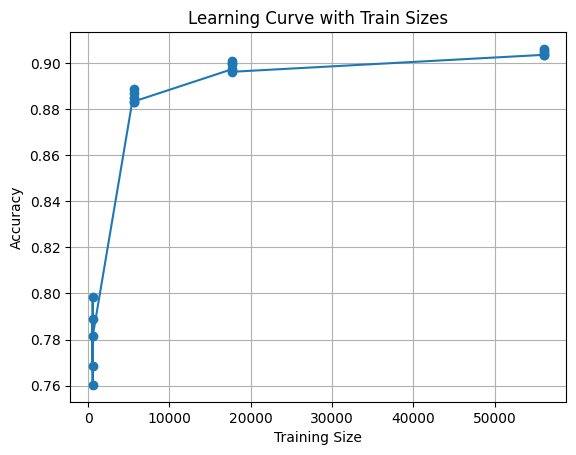

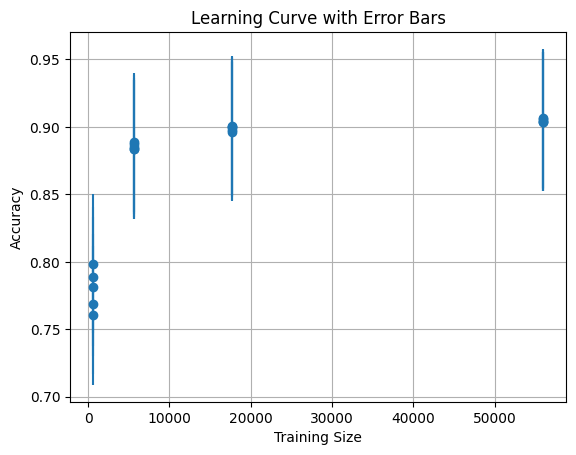

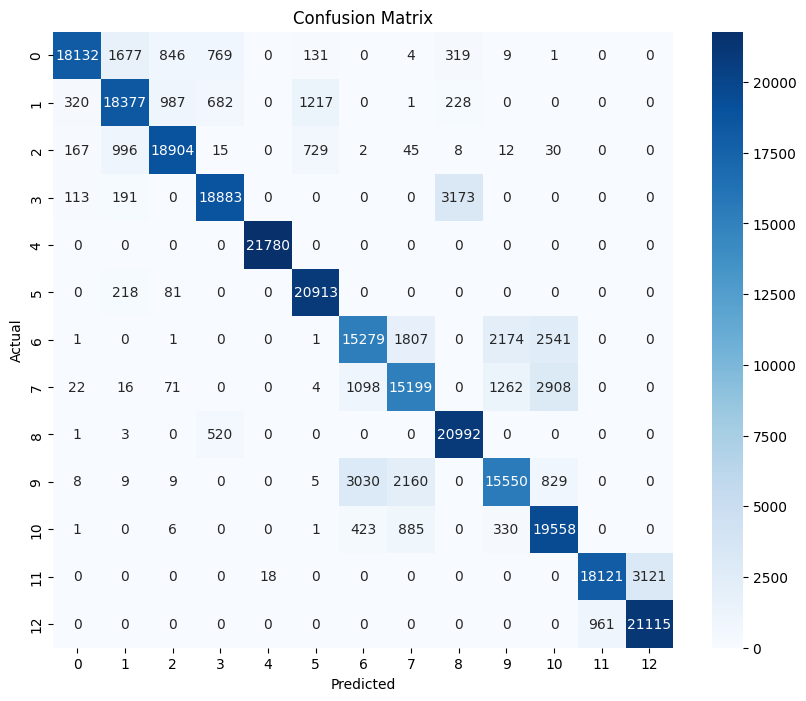

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     21888
           1       0.86      0.84      0.85     21812
           2       0.90      0.90      0.90     20908
           3       0.90      0.84      0.87     22360
           4       1.00      1.00      1.00     21780
           5       0.91      0.99      0.95     21212
           6       0.77      0.70      0.73     21804
           7       0.76      0.74      0.75     20580
           8       0.85      0.98      0.91     21516
           9       0.80      0.72      0.76     21600
          10       0.76      0.92      0.83     21204
          11       0.95      0.85      0.90     21260
          12       0.87      0.96      0.91     22076

    accuracy                           0.87    280000
   macro avg       0.87      0.87      0.87    280000
weighted avg       0.87      0.87      0.87    280000



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


train_sizes = np.concatenate(([0.01], np.logspace(-1, 0, 3)))  # [0.01, 0.1, 0.5, 1.0]
n_repeats = 20
accuracies = []
train_sizes_actual = []
all_y_test = []
all_y_pred = []


experiments_per_size = n_repeats // len(train_sizes)


for size in train_sizes:
    for i in range(experiments_per_size):
        X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=i)


        subset_train_idx = X_train.index[:int(len(X_train) * size)]
        X_train_subset = X_train.loc[subset_train_idx]
        y_train_subset = y_train.loc[subset_train_idx]


        model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=None)
        model.fit(X_train_subset, y_train_subset)


        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        train_sizes_actual.append(len(X_train_subset))


        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)

        print(f"Experiment with Train Size {len(X_train_subset)}: Accuracy = {accuracy:.3f}")


mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

# learning curve
plt.figure()
plt.plot(train_sizes_actual, accuracies, marker='o', label='Accuracy')
plt.title("Learning Curve with Train Sizes")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Error bar
plt.figure()
plt.errorbar(x=train_sizes_actual, y=accuracies, yerr=std_accuracy, fmt='o', label='Accuracy with error bar')
plt.title("Learning Curve with Error Bars")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

#conf matrix
conf_matrix = confusion_matrix(all_y_test, all_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(all_y_test, all_y_pred))


In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


def nested_cross_validation(X, y, param_grid, k_outer=5, k_inner=3):
    outer_folds = manual_kfold(X, y, k=k_outer, random_state=42)
    outer_scores = []


    for fold_idx, (train_idx, test_idx) in enumerate(outer_folds):
        X_train_outer, X_test_outer = X.iloc[train_idx], X.iloc[test_idx]
        y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]

        best_params = None
        best_score = -np.inf


        inner_folds = manual_kfold(X_train_outer, y_train_outer, k=k_inner, random_state=42)

        for params in param_grid:
            inner_scores = []


            for inner_train_idx, inner_val_idx in inner_folds:
                X_train_inner, X_val_inner = X_train_outer.iloc[inner_train_idx], X_train_outer.iloc[inner_val_idx]
                y_train_inner, y_val_inner = y_train_outer.iloc[inner_train_idx], y_train_outer.iloc[inner_val_idx]

                model = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
                model.fit(X_train_inner, y_train_inner)

                y_val_pred = model.predict(X_val_inner)
                inner_scores.append(accuracy_score(y_val_inner, y_val_pred))

            mean_inner_score = np.mean(inner_scores)


            if mean_inner_score > best_score:
                best_score = mean_inner_score
                best_params = params


        best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
        best_model.fit(X_train_outer, y_train_outer)
        y_test_pred = best_model.predict(X_test_outer)

        test_accuracy = accuracy_score(y_test_outer, y_test_pred)
        outer_scores.append(test_accuracy)

        print(f"Fold {fold_idx+1}: Best Params = {best_params}, Test Accuracy = {test_accuracy:.3f}")


    mean_score = np.mean(outer_scores)
    std_score = np.std(outer_scores)
    print(f"Nested CV Mean Accuracy: {mean_score:.3f}, Std: {std_score:.3f}")


param_grid = [
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': 20},
    {'n_estimators': 200, 'max_depth': None}
]


nested_cross_validation(X, y, param_grid)


Fold 1: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.901
Fold 2: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.906
Fold 3: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.905
Fold 4: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.904
Fold 5: Best Params = {'n_estimators': 200, 'max_depth': None}, Test Accuracy = 0.898
Nested CV Mean Accuracy: 0.903, Std: 0.003


### 3.2 Medium algorithms: MLP

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import numpy as np

In [24]:
def train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs=30, eta=0.01, optimizer='Adam', params=None):
    # Convert Pandas DataFrames to NumPy arrays
    X_train_scaled, X_test_scaled, y_train, y_test = X_train_scaled.to_numpy(), X_test_scaled.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
    # Convert to PyTorch tensors
    X_train_scaled, X_test_scaled, y_train, y_test = torch.from_numpy(X_train_scaled), torch.from_numpy(X_test_scaled), torch.from_numpy(y_train), torch.from_numpy(y_test)


    # Check number of classes
    n_classes = len(torch.unique(y_train))

    # Create iterable dataset in Torch format
    train_ds = torch.utils.data.TensorDataset(X_train_scaled, y_train)
    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32)
    test_ds = torch.utils.data.TensorDataset(X_test_scaled, y_test)
    test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32)

    # Create the multi-layer perceptron model
    model = nn.Sequential(
            nn.Linear(33, 128, dtype=torch.float64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(128, 64, dtype=torch.float64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(64, 32, dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(32, 16, dtype=torch.float64),
            nn.ReLU(),
            #nn.Dropout(0.2),
            nn.Linear(16, n_classes, dtype=torch.float64),
            )

    # Define the loss function
    criterion = nn.CrossEntropyLoss()

    # Use the provided or default parameters
    if params:
        n_epochs = params.get('n_epochs', n_epochs)
        eta = params.get('eta', eta)
        optimizer = params.get('optimizer', optimizer)


    # Setup the optimizer. This implements the basic gradient descent update
    if optimizer == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta)
    elif optimizer == 'Momentum':
        optimizer = torch.optim.SGD(model.parameters(), lr=eta, momentum=0.9)
    elif optimizer == 'Adagrad':
        optimizer = torch.optim.Adagrad(model.parameters(), lr=eta, eps=1e-10)
    elif optimizer == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=eta)
    else:
        raise ValueError('Invalid optimizer')

    for epoch in range(n_epochs):
        for i, (xi, yi) in enumerate(train_loader):
            #Compute loss F(w)
            yi = yi.long()
            logits = model(xi)
            loss = criterion(logits, yi)

            predictions = torch.argmax(logits, dim=1)
            train_acc = torch.mean(torch.eq(predictions, yi).float()).item()

            loss.backward()               # Backward pass (compute parameter gradients)
            optimizer.step()              # Update weight parameter using SGD
            optimizer.zero_grad()         # Reset gradients to zero for next ieration

    # Evaluate the model, not necessary for training
    with torch.no_grad():
        for xi, yi in test_loader:
            yi = yi.long()
            logits = model(xi)
            loss = criterion(logits, yi)
            predictions = torch.argmax(logits, dim=1)
            accuracy = torch.mean(torch.eq(predictions, yi).float()).item()

    return accuracy

In [28]:
def nested_cross_validation(X, y, param_grid, outer_k=5, inner_k=3, n_epochs=30, eta=0.01, optimizer='Adam'):
    outer_kf = manual_kfold(X, y, k=outer_k, random_state=42)
    outer_scores = []

    for outer_fold, (train_index, test_index) in enumerate(outer_kf):
        #print(f"Outer Fold {outer_fold + 1}")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        best_params = None
        best_score = -np.inf

        inner_kf = manual_kfold(X_train, y_train, k=inner_k, random_state=42)

        for params in param_grid:
            inner_scores = []
            for inner_fold, (inner_train_index, inner_val_index) in enumerate(inner_kf):
                X_train_inner, X_val_inner = X_train.iloc[inner_train_index], X_train.iloc[inner_val_index]
                y_train_inner, y_val_inner = y_train.iloc[inner_train_index], y_train.iloc[inner_val_index]

                # Scaling
                scaler = StandardScaler()
                X_train_inner_scaled = scaler.fit_transform(X_train_inner)
                X_val_inner_scaled = scaler.transform(X_val_inner)

                # Convert to Pandas DataFrame
                X_train_inner_scaled = pd.DataFrame(X_train_inner_scaled, columns=X_train_inner.columns)
                X_val_inner_scaled = pd.DataFrame(X_val_inner_scaled, columns=X_val_inner.columns)

                # Train model
                val_acc = train_perceptron_pytorch(X_train_inner_scaled, X_val_inner_scaled, y_train_inner, y_val_inner, n_epochs, eta, optimizer, params)
                inner_scores.append(val_acc)

            mean_inner_score = np.mean(inner_scores)
            if mean_inner_score > best_score:
                best_score = mean_inner_score
                best_params = params

        # Train the model with the best parameters
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Convert to Pandas DataFrame
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        test_acc = train_perceptron_pytorch(X_train_scaled, X_test_scaled, y_train, y_test, n_epochs, eta, optimizer, best_params)
        outer_scores.append(test_acc)

        print(f"Outer Fold {outer_fold + 1}: Best Params = {best_params}, Test Accuracy = {test_acc:.3f}")

    mean_score = np.mean(outer_scores)
    std_score = np.std(outer_scores)
    print(f"Nested CV Mean Accuracy: {mean_score:.3f}, Std: {std_score:.3f}")


param_grid = [
    {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Momentum'},
    {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Momentum'},
    {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Adam'},
    {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Adam'}
]


nested_cross_validation(X, y, param_grid, outer_k=5, inner_k=3, n_epochs=30, eta=0.01, optimizer='Adam')

Outer Fold 1: Best Params = {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Adam'}, Test Accuracy = 0.812
Outer Fold 2: Best Params = {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Adam'}, Test Accuracy = 0.750
Outer Fold 3: Best Params = {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Momentum'}, Test Accuracy = 0.812
Outer Fold 4: Best Params = {'n_epochs': 30, 'eta': 0.01, 'optimizer': 'Momentum'}, Test Accuracy = 0.625
Outer Fold 5: Best Params = {'n_epochs': 20, 'eta': 0.01, 'optimizer': 'Adam'}, Test Accuracy = 0.812
Nested CV Mean Accuracy: 0.762, Std: 0.073
